<a href="https://colab.research.google.com/github/SulaksanaHS/MachineLearning-2/blob/main/Prediksi_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Path ke file di Google Drive
file_path = "/content/drive/My Drive/content/diabetes.csv"

# Baca file CSV
df = pd.read_csv(file_path)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# Cek ukuran dataset
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (768, 9)


In [7]:
# Cek tipe data di setiap kolom dan non-null count
print("\nInformasi kolom:")
print(df.info())


Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [8]:
# Cek statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0

In [9]:
# Cek jumlah nilai kosong di setiap kolom
print("\nJumlah nilai kosong per kolom:")
print(df.isnull().sum())


Jumlah nilai kosong per kolom:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
# Cek jumlah nilai 0 di kolom yang seharusnya tidak 0
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_check:
    print(f"{col} - jumlah nilai 0:", (df[col] == 0).sum())

Glucose - jumlah nilai 0: 5
BloodPressure - jumlah nilai 0: 35
SkinThickness - jumlah nilai 0: 227
Insulin - jumlah nilai 0: 374
BMI - jumlah nilai 0: 11


In [11]:
# List kolom yang akan dicek dan diganti nilai 0-nya
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [12]:
# Ganti nilai 0 dengan mean dari masing-masing kolom
for col in cols_to_replace:
    mean_value = df[col][df[col] != 0].mean()  # hitung mean tanpa nilai 0
    df[col] = df[col].replace(0, mean_value)

In [13]:
for col in cols_to_replace:
    print(f"{col} - jumlah nilai 0 setelah imputasi:", (df[col] == 0).sum())

Glucose - jumlah nilai 0 setelah imputasi: 0
BloodPressure - jumlah nilai 0 setelah imputasi: 0
SkinThickness - jumlah nilai 0 setelah imputasi: 0
Insulin - jumlah nilai 0 setelah imputasi: 0
BMI - jumlah nilai 0 setelah imputasi: 0


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
# Pisahkan fitur (X) dan label (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [16]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Split data jadi 75% training dan 25% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)

In [19]:
# Training model Logistic Regression
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Prediksi hasil
y_pred = model.predict(X_test)

In [22]:
# Prediksi probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Ubah ambang batas threshold jadi 0.4 (lebih sensitif)
y_pred_custom = (y_proba >= 0.4).astype(int)

In [23]:
# Evaluasi ulang
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy:.2f}")

Akurasi model: 0.73


In [25]:
# Tampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       123
           1       0.63      0.59      0.61        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

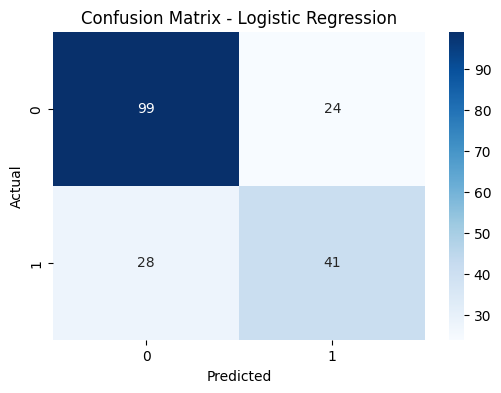

In [29]:
# Visualisasi matrix-nya
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()